<a href="https://colab.research.google.com/github/MartinPdeS/FiberFusing/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing FiberFusing and depedencies

In [1]:
!python -m pip install FiberFusing --no-cache-dir  --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.3 MB/s eta 0:00:00


## Importing the package

In [4]:
from FiberFusing import Geometry, DomainAlignment, BackGround
from FiberFusing.fiber import FiberLoader
from FiberFusing.profile import Profile, StructureType

## Defining the different layer to add to the simulation.

In [5]:
air_background = BackGround(refractive_index=1.0)

profile = Profile()

profile.add_structure(
    structure_type=StructureType.CIRCULAR,
    number_of_fibers=3,
    fusion_degree=0.4,
    fiber_radius=62.5e-6,
    compute_fusing=True
)

profile.refractive_index = 1.4444  # Refractive index of silica at the specified wavelength

## Defining the geometry object

In [9]:
fiber_loader = FiberLoader()

fiber_0 = fiber_loader.load_fiber('SMF28', clad_refractive_index=profile.refractive_index, position=profile.cores[0])
fiber_1 = fiber_loader.load_fiber('DCF1300S_33', clad_refractive_index=profile.refractive_index, position=profile.cores[1])
fiber_2 = fiber_loader.load_fiber('SMF28', clad_refractive_index=profile.refractive_index, position=profile.cores[2])

fibers = [fiber_0, fiber_1, fiber_2]

## Ploting the patch an rasterized geometry

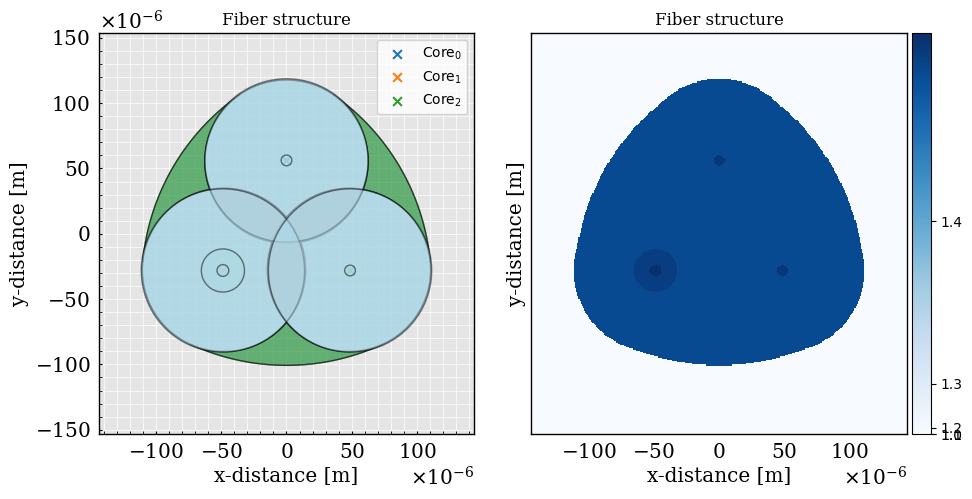

In [10]:
geometry = Geometry(
    x_bounds=DomainAlignment.CENTERING,
    y_bounds=DomainAlignment.CENTERING,
    resolution=350
)

geometry.add_structure(air_background, profile, *fibers)

geometry.initialize()

_ = geometry.plot(show_patch=True)